<a href="https://colab.research.google.com/github/rimgosu/ColabBackup/blob/master/ex02_%EC%86%90%EA%B8%80%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
  - 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자!
  - 다중분류 딥러닝 모델을 연습해보자~

In [1]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩

In [3]:
# keras 에서 제공해주는 손글씨데이터 불러오기
from tensorflow.keras.datasets import mnist

In [4]:
# 문제데이터와 정답데이터가 나뉘어 제공해주고 있음
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# 데이터 크기 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

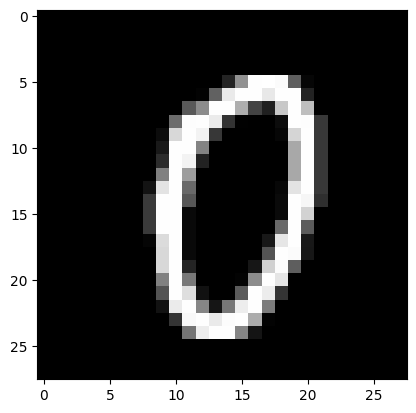

In [9]:
# 사진데이터 확인
plt.imshow(X_train[1000], cmap='gray')
# 0~255의 숫자를 가진다

In [8]:
# 정답데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- LOSS, OPTIMIZER 설정

In [11]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense : 퍼셉트론을 묶음으로 표현하는 클래스
# inputLayer : 입력층 설정
# Flatten : 2차원의 사진 데이터를 1차원으로 표현하기 위한 클래

In [16]:
# 1. 신경망 설계
digit_model = Sequential()
digit_model.add(InputLayer(input_shape = (28,28)))
digit_model.add(Flatten()) # 2차원 => 1차원 변
digit_model.add(Dense(units=16, activation='sigmoid'))
digit_model.add(Dense(units=8, activation='sigmoid'))
# 출력층
digit_model.add(Dense(units=10))
# 다중 분류는 클래스의 갯수만큼 선형 모델이 필요하다
# softmax

In [18]:
# 2. 모델 학습 및 평가 방법 설
digit_model.compile(loss = 'categorical_crossentropy',
                    optimizer= 'SGD',
                    metrics = ['accuracy'])